# This notebook is used for

## import some libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 270

from nc_reader import NcReader

In [2]:
help(NcReader.dump_content)

Help on function dump_content in module nc_reader:

dump_content(self, root='/', recurse_subgroup=True, slice_index={}, ignored_variable_list=[])
    Display all group content (name, types, attributes, variables)
    Variable content is displayed if numeric as 1D or 2D plots.
    When dimensions of variable is higher that 2 a reduction is done on dimension equals to 1 and if not enough the slice_index parameter is used to reduce dimensions
    Vlen data is filled up with invalid values along the variable length dimension in order to be displayed properly
    :param root: the root path used as a starting point
    :param recurse_subgroup: boolean indicating if recursion into subgroup is done
    :param slice_index: parameter containing a dictionnary of index that should be use to reduce dimension if needed for example slice_index={'ping_time':3}
    :param ignored_variable_list: list of variables that should be ignored
    :return: None



In [3]:
help(NcReader.dump_groups)

Help on function dump_groups in module nc_reader:

dump_groups(self, starting_path='/')
    Parse recursively all group and print their names
    :param starting_path: the group starting point
    :return: None



## Set file path

In [4]:
file_path= "D:/data/file/XSF/Movies/Sardine_schools_1.xsf.nc"
file_path = "D:/XSF/0006_20200504_111056_FG_EM122.xsf.nc"
file_path = "D:/data/file/XSF/ExampleSonarData/test90-D20171107-T195133.nc"
file_path= "D:/data/file/XSF/Movies/SEEKLEAK_009_20170913_145231_2.xsf.nc"


In [5]:
#open the file 
reader = NcReader(file_path)

In [6]:
reader.dump_groups()

-+Root
 |-Environment
 |-Platform
 |-Provenance
 |+Sonar
  |-Beam_group1


## Dump root without recursion

In [8]:
reader.dump_content(root="/",recurse_subgroup=False)

Root Group /
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7, SONAR-netCDF4-1.1, ACDD-1.3
    date_created: null
    keywords: null
    license: null
    rights: null
    sonar_convention_authority: ICES
    sonar_convention_name: SONAR-netCDF4
    sonar_convention_version: 1.1
    summary: null
    title: null
    xsf_convention_version: 0.1
    dimensions(sizes): 
    variables(dimensions): 
    groups: Environment, Platform, Provenance, Sonar



## Dump Sonar group with recursion

Here we need to add some ping selection, if not backscatter data cannot be displayed since it will be a ping*beam*vlen ie a kind of 3D matrix




Variable <class 'netCDF4._netCDF4.Variable'>
vlen backscatter_r(ping_time, beam, subbeam)
    long_name: Raw backscatter measurements (real part)
    units: as appropriate
    scale_factor: 0.01
    missing_value: -32768
vlen data type: int16
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21, 1)
 : /Sonar/Beam_group1/backscatter_r
<class 'netCDF4._netCDF4.Variable'>
vlen backscatter_r(ping_time, beam, subbeam)
    long_name: Raw backscatter measurements (real part)
    units: as appropriate
    scale_factor: 0.01
    missing_value: -32768
vlen data type: int16
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21, 1)

Vlen variable /Sonar/Beam_group1/backscatter_r : reduced shape for display is  ('beam',) ((21,))
Variable : /Sonar/Beam_group1/backscatter_r size =(1546, 21)
statistics min:-99.979996 max:36.399998


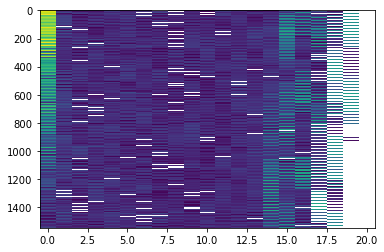

In [10]:
reader.dump_content(root="/Sonar/Beam_group1/backscatter_r",slice_index={'ping_time':5})

## Dump Sonar.Beam_group1 group with recursion

Group Beam_group1 (/Sonar/Beam_group1
<class 'netCDF4._netCDF4.Group'>
group /Sonar/Beam_group1:
    beam_mode: null
    preferred_MRU: 0
    preferred_position: 0
    dimensions(sizes): beam(21), subbeam(1), ping_time(860), tx_beam(21)
    variables(dimensions): int16 backscatter_r(ping_time,beam,subbeam), <class 'str'> beam(beam), uint64 ping_time(ping_time), float32 backscatter_i(ping_time,beam,subbeam), int16 echoangle_major(ping_time,beam), int16 echoangle_minor(ping_time,beam), float32 echoangle_major_sensitivity(beam), float32 echoangle_minor_sensitivity(beam), float32 beamwidth_receive_major(ping_time,beam), float32 beamwidth_receive_minor(ping_time,beam), float32 beamwidth_transmit_major(ping_time,tx_beam), float32 beamwidth_transmit_minor(ping_time,tx_beam), float32 rx_beam_rotation_phi(ping_time,beam), float32 rx_beam_rotation_theta(ping_time,beam), float32 rx_beam_rotation_psi(ping_time,beam), float32 tx_beam_rotation_phi(ping_time,tx_beam), float32 tx_beam_rotation_theta(p

C:\Globe\workspace\pyat\notebooks\XSF_Tools\nc_reader.py:86: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  return np.array(variable).transpose()


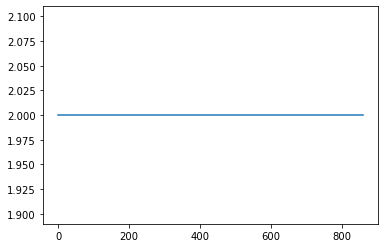




Variable <class 'netCDF4._netCDF4.Variable'>
vlen backscatter_i(ping_time, beam, subbeam)
    long_name: Raw backscatter measurements (imaginary part)
    units: as appropriate
vlen data type: float32
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21, 1)
 : /Sonar/Beam_group1/backscatter_i
<class 'netCDF4._netCDF4.Variable'>
vlen backscatter_i(ping_time, beam, subbeam)
    long_name: Raw backscatter measurements (imaginary part)
    units: as appropriate
vlen data type: float32
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21, 1)

Vlen variable /Sonar/Beam_group1/backscatter_i : reduced shape for display is  ('ping_time',) ((860,))
Variable : /Sonar/Beam_group1/backscatter_i size =(0, 860)
Empty values dimensions = (0, 860)



Variable <class 'netCDF4._netCDF4.Variable'>
vlen backscatter_r(ping_time, beam, subbeam)
    long_name: Raw backscatter measurements (real part)
    units: as appropriate
    scale_factor: 0.0

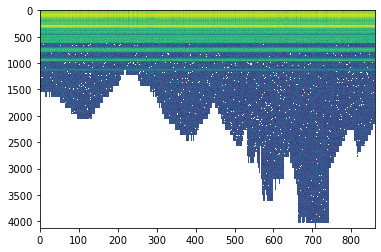




Variable <class 'netCDF4._netCDF4.Variable'>
vlen beam(beam)
    long_name: ME70
vlen data type: <class 'str'>
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
 : /Sonar/Beam_group1/beam
<class 'netCDF4._netCDF4.Variable'>
vlen beam(beam)
    long_name: ME70
vlen data type: <class 'str'>
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)

Variable <class 'netCDF4._netCDF4.Variable'>
vlen beam(beam)
    long_name: ME70
vlen data type: <class 'str'>
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
 is of type string
Variable <class 'netCDF4._netCDF4.Variable'>
vlen beam(beam)
    long_name: ME70
vlen data type: <class 'str'>
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
 21 values (['',...,'']



Variable <class 'netCDF4._netCDF4.Variable'>
enum beam_stabilisation(ping_time)
    long_name: Beam stabilisation applied (or not)
    coordinates: ping_time platform_latitude platform_longitude
enum data

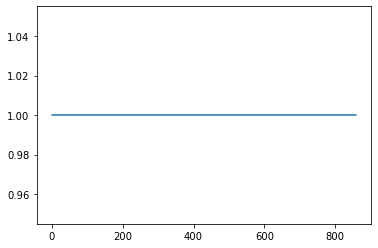




Variable <class 'netCDF4._netCDF4.Variable'>
enum beam_type()
    long_name: Type of beam
enum data type: uint8
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = ()
 : /Sonar/Beam_group1/beam_type
<class 'netCDF4._netCDF4.Variable'>
enum beam_type()
    long_name: Type of beam
enum data type: uint8
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = ()

Variable : /Sonar/Beam_group1/beam_type size =()
Cannot display variable : /Sonar/Beam_group1/beam_type size =()
Values =0



Variable <class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_receive_major(ping_time, beam)
    _FillValue: nan
    long_name: Half power one-way receive beam width along major (horizontal) axis of beam
    units: arc_degree
    valid_range: [  0. 360.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/beamwidth_receive_major
<class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_receive_major(ping_time, beam)
    _F

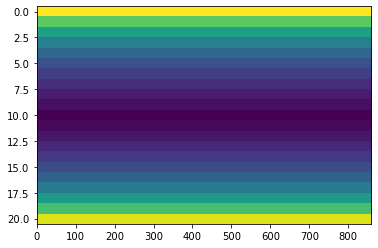




Variable <class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_receive_minor(ping_time, beam)
    _FillValue: nan
    long_name: Half power one-way receive beam width along minor (vertical) axis of beam
    units: arc_degree
    valid_range: [  0. 360.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/beamwidth_receive_minor
<class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_receive_minor(ping_time, beam)
    _FillValue: nan
    long_name: Half power one-way receive beam width along minor (vertical) axis of beam
    units: arc_degree
    valid_range: [  0. 360.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/beamwidth_receive_minor size =(21, 860)
statistics min:3.0296 max:4.9715


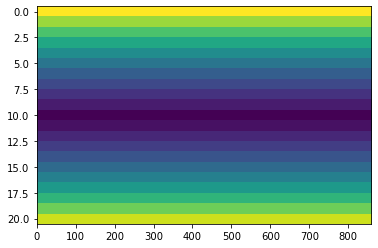




Variable <class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_transmit_major(ping_time, tx_beam)
    _FillValue: nan
    long_name: Half power one-way transmit beam width along major (horizontal) axis of beam
    units: arc_degree
    valid_range: [  0. 360.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/beamwidth_transmit_major
<class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_transmit_major(ping_time, tx_beam)
    _FillValue: nan
    long_name: Half power one-way transmit beam width along major (horizontal) axis of beam
    units: arc_degree
    valid_range: [  0. 360.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/beamwidth_transmit_major size =(21, 860)
statistics min:3.0497 max:6.7474


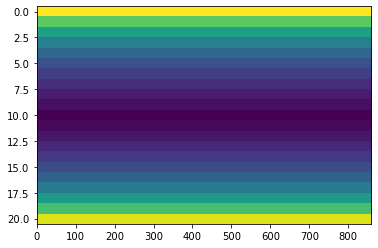




Variable <class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_transmit_minor(ping_time, tx_beam)
    _FillValue: nan
    long_name: Half power one-way transmit beam width along minor (vertical) axis of beam
    units: arc_degree
    valid_range: [  0. 360.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/beamwidth_transmit_minor
<class 'netCDF4._netCDF4.Variable'>
float32 beamwidth_transmit_minor(ping_time, tx_beam)
    _FillValue: nan
    long_name: Half power one-way transmit beam width along minor (vertical) axis of beam
    units: arc_degree
    valid_range: [  0. 360.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/beamwidth_transmit_minor size =(21, 860)
statistics min:3.0296 max:4.9715


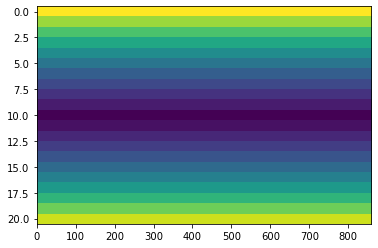




Variable <class 'netCDF4._netCDF4.Variable'>
float32 blanking_interval(ping_time, beam)
    _FillValue: nan
    long_name: Amount of time during reception where samples are discarded
    units: s
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/blanking_interval
<class 'netCDF4._netCDF4.Variable'>
float32 blanking_interval(ping_time, beam)
    _FillValue: nan
    long_name: Amount of time during reception where samples are discarded
    units: s
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/blanking_interval size =(21, 860)
statistics min:0.0 max:0.0


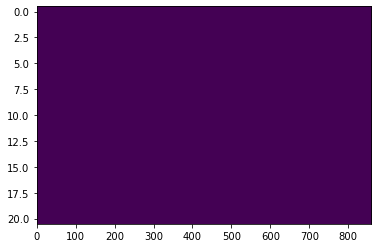




Variable <class 'netCDF4._netCDF4.Variable'>
float32 detected_bottom_range(ping_time, beam)
    _FillValue: nan
    long_name: Detected range of the bottom
    units: m
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/detected_bottom_range
<class 'netCDF4._netCDF4.Variable'>
float32 detected_bottom_range(ping_time, beam)
    _FillValue: nan
    long_name: Detected range of the bottom
    units: m
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/detected_bottom_range size =(21, 860)
statistics min:69.266 max:389.523


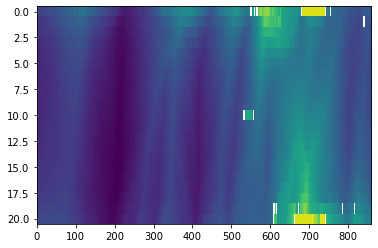




Variable <class 'netCDF4._netCDF4.Variable'>
vlen echoangle_major(ping_time, beam)
    long_name: Echo arrival angle in the major beam coordinate
    units: arc_degree
    scale_factor: 0.01
    valid_range: [-18000  18000]
    missing_value: -32768
vlen data type: int16
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
 : /Sonar/Beam_group1/echoangle_major
<class 'netCDF4._netCDF4.Variable'>
vlen echoangle_major(ping_time, beam)
    long_name: Echo arrival angle in the major beam coordinate
    units: arc_degree
    scale_factor: 0.01
    valid_range: [-18000  18000]
    missing_value: -32768
vlen data type: int16
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)

Vlen variable /Sonar/Beam_group1/echoangle_major : reduced shape for display is  ('ping_time',) ((860,))
Variable : /Sonar/Beam_group1/echoangle_major size =(4124, 860)
statistics min:-5.29 max:5.0899997


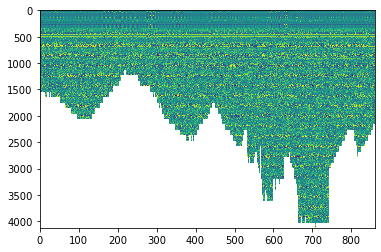




Variable <class 'netCDF4._netCDF4.Variable'>
float32 echoangle_major_sensitivity(beam)
    _FillValue: nan
    long_name: Major angle scaling factor
    units: 1
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
filling on : /Sonar/Beam_group1/echoangle_major_sensitivity
<class 'netCDF4._netCDF4.Variable'>
float32 echoangle_major_sensitivity(beam)
    _FillValue: nan
    long_name: Major angle scaling factor
    units: 1
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
filling on
Variable : /Sonar/Beam_group1/echoangle_major_sensitivity size =(21,)
Statistics min:1.0 max:1.0


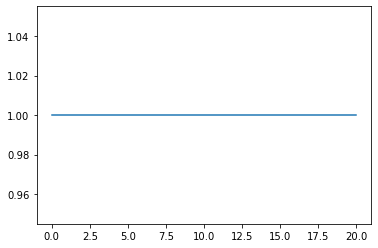




Variable <class 'netCDF4._netCDF4.Variable'>
vlen echoangle_minor(ping_time, beam)
    long_name: Echo arrival angle in the minor beam coordinate
    units: arc_degree
    scale_factor: 0.01
    valid_range: [-18000  18000]
    missing_value: -32768
vlen data type: int16
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
 : /Sonar/Beam_group1/echoangle_minor
<class 'netCDF4._netCDF4.Variable'>
vlen echoangle_minor(ping_time, beam)
    long_name: Echo arrival angle in the minor beam coordinate
    units: arc_degree
    scale_factor: 0.01
    valid_range: [-18000  18000]
    missing_value: -32768
vlen data type: int16
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)

Vlen variable /Sonar/Beam_group1/echoangle_minor : reduced shape for display is  ('ping_time',) ((860,))
Variable : /Sonar/Beam_group1/echoangle_minor size =(4124, 860)
statistics min:-3.73 max:3.6999998


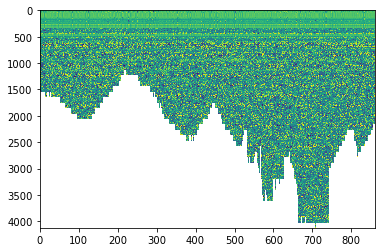




Variable <class 'netCDF4._netCDF4.Variable'>
float32 echoangle_minor_sensitivity(beam)
    _FillValue: nan
    long_name: Minor angle scaling factor
    units: 1
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
filling on : /Sonar/Beam_group1/echoangle_minor_sensitivity
<class 'netCDF4._netCDF4.Variable'>
float32 echoangle_minor_sensitivity(beam)
    _FillValue: nan
    long_name: Minor angle scaling factor
    units: 1
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
filling on
Variable : /Sonar/Beam_group1/echoangle_minor_sensitivity size =(21,)
Statistics min:1.0 max:1.0


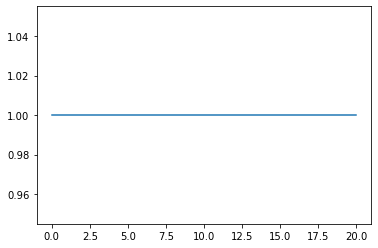




Variable <class 'netCDF4._netCDF4.Variable'>
float32 equivalent_beam_angle(ping_time, beam)
    _FillValue: nan
    long_name: Equivalent beam angle
    units: sr
    valid_range: [ 0.       12.566371]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/equivalent_beam_angle
<class 'netCDF4._netCDF4.Variable'>
float32 equivalent_beam_angle(ping_time, beam)
    _FillValue: nan
    long_name: Equivalent beam angle
    units: sr
    valid_range: [ 0.       12.566371]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/equivalent_beam_angle size =(21, 860)
statistics min:0.0016329767 max:0.0059203855





Variable <class 'netCDF4._netCDF4.Variable'>
float32 gain_correction(ping_time, beam)
    _FillValue: nan
    long_name: Gain correction
    units: dB
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/gain_correction
<class 'netCDF4._netCDF4.Variable'>
float32 gain_correction(ping_time, beam)
    _FillValue: nan
    long_name: Gain correction
    units: dB
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/gain_correction size =(21, 860)
statistics min:-1.4879 max:-1.429


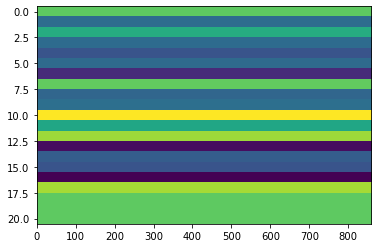




Variable <class 'netCDF4._netCDF4.Variable'>
int8 non_quantitative_processing(ping_time)
    flag_meanings: null
    long_name: Presence or not of non-quantitative processing applied to the backscattering data (sonar specific)
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on, default _FillValue of -127 ignored
 : /Sonar/Beam_group1/non_quantitative_processing
<class 'netCDF4._netCDF4.Variable'>
int8 non_quantitative_processing(ping_time)
    flag_meanings: null
    long_name: Presence or not of non-quantitative processing applied to the backscattering data (sonar specific)
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on, default _FillValue of -127 ignored

Variable : /Sonar/Beam_group1/non_quantitative_processing size =(860,)
Statistics min:0 max:0





Variable <class 'netCDF4._netCDF4.Variable'>
uint64 ping_time(ping_time)
    axis: T
    calendar: gregorian
    long_name: Time-stamp of each ping
    standard_name: time
    units: nanoseconds since 1601-01-01 00:00:00Z
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on, default _FillValue of 18446744073709551614 used
 : /Sonar/Beam_group1/ping_time
<class 'netCDF4._netCDF4.Variable'>
uint64 ping_time(ping_time)
    axis: T
    calendar: gregorian
    long_name: Time-stamp of each ping
    standard_name: time
    units: nanoseconds since 1601-01-01 00:00:00Z
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on, default _FillValue of 18446744073709551614 used

Variable : /Sonar/Beam_group1/ping_time size =(860,)
Statistics min:1505314350990400000 max:1505314950660100096





Variable <class 'netCDF4._netCDF4.Variable'>
float32 platform_heading(ping_time)
    _FillValue: nan
    standard_name: platform_orientation
    units: degrees_north
    long_name: Platform heading(true)
    valid_range: [  0. 360.]
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/platform_heading
<class 'netCDF4._netCDF4.Variable'>
float32 platform_heading(ping_time)
    _FillValue: nan
    standard_name: platform_orientation
    units: degrees_north
    long_name: Platform heading(true)
    valid_range: [  0. 360.]
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/platform_heading size =(860,)
Statistics min:56.0 max:283.6


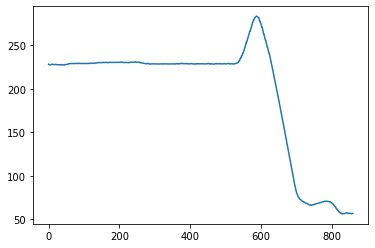




Variable <class 'netCDF4._netCDF4.Variable'>
float64 platform_latitude(ping_time)
    _FillValue: nan
    valid_range: [-90.  90.]
    standard_name: Platform latitude
    units: degrees_north
    long_name: latitude
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/platform_latitude
<class 'netCDF4._netCDF4.Variable'>
float64 platform_latitude(ping_time)
    _FillValue: nan
    valid_range: [-90.  90.]
    standard_name: Platform latitude
    units: degrees_north
    long_name: latitude
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/platform_latitude size =(860,)
Statistics min:43.638200435 max:43.642758





Variable <class 'netCDF4._netCDF4.Variable'>
float64 platform_longitude(ping_time)
    _FillValue: nan
    valid_range: [-180.  180.]
    standard_name: Platform longitude
    units: degrees_east
    long_name: longitude
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/platform_longitude
<class 'netCDF4._netCDF4.Variable'>
float64 platform_longitude(ping_time)
    _FillValue: nan
    valid_range: [-180.  180.]
    standard_name: Platform longitude
    units: degrees_east
    long_name: longitude
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/platform_longitude size =(860,)
Statistics min:7.206854000000001 max:7.215857


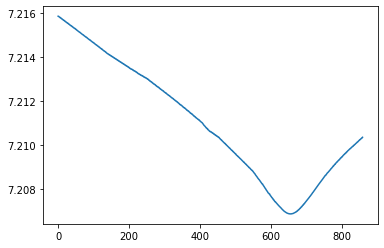




Variable <class 'netCDF4._netCDF4.Variable'>
float32 platform_pitch(ping_time)
    _FillValue: nan
    standard_name: platform_pitch_angle
    units: arc_degree
    long_name: pitch angle
    valid_range: [-90.  90.]
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/platform_pitch
<class 'netCDF4._netCDF4.Variable'>
float32 platform_pitch(ping_time)
    _FillValue: nan
    standard_name: platform_pitch_angle
    units: arc_degree
    long_name: pitch angle
    valid_range: [-90.  90.]
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/platform_pitch size =(860,)
Statistics min:-1.0 max:1.7


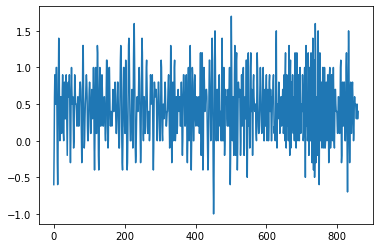




Variable <class 'netCDF4._netCDF4.Variable'>
float32 platform_roll(ping_time)
    _FillValue: nan
    standard_name: platform_roll_angle
    units: arc_degree
    long_name: roll angle
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/platform_roll
<class 'netCDF4._netCDF4.Variable'>
float32 platform_roll(ping_time)
    _FillValue: nan
    standard_name: platform_roll_angle
    units: arc_degree
    long_name: roll angle
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/platform_roll size =(860,)
Statistics min:-2.2 max:3.1


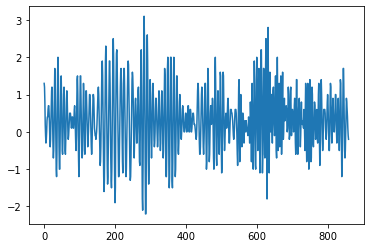




Variable <class 'netCDF4._netCDF4.Variable'>
float32 platform_vertical_offset(ping_time)
    _FillValue: nan
    long_name: Platform vertical distance from reference point to the water line
    units: m
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/platform_vertical_offset
<class 'netCDF4._netCDF4.Variable'>
float32 platform_vertical_offset(ping_time)
    _FillValue: nan
    long_name: Platform vertical distance from reference point to the water line
    units: m
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/platform_vertical_offset size =(860,)
Statistics min:-0.2 max:0.23


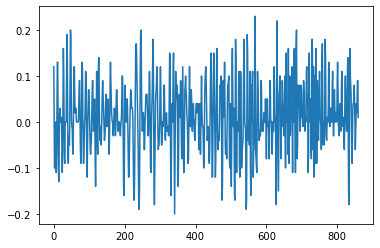




Variable <class 'netCDF4._netCDF4.Variable'>
float32 receive_duration_effective(ping_time, tx_beam)
    _FillValue: nan
    long_name: Effective duration of received pulse
    units: s
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/receive_duration_effective
<class 'netCDF4._netCDF4.Variable'>
float32 receive_duration_effective(ping_time, tx_beam)
    _FillValue: nan
    long_name: Effective duration of received pulse
    units: s
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/receive_duration_effective size =(21, 860)
statistics min:0.0005160835 max:0.00053027354


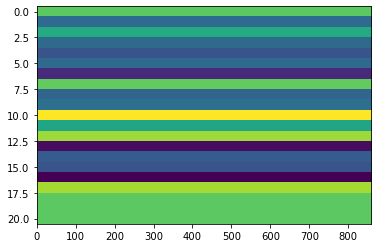




Variable <class 'netCDF4._netCDF4.Variable'>
int32 receive_transducer_index(beam)
    valid_min: 0
    long_name: Receive transducer index
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
filling on, default _FillValue of -2147483647 used
 : /Sonar/Beam_group1/receive_transducer_index
<class 'netCDF4._netCDF4.Variable'>
int32 receive_transducer_index(beam)
    valid_min: 0
    long_name: Receive transducer index
path = /Sonar/Beam_group1
unlimited dimensions: 
current shape = (21,)
filling on, default _FillValue of -2147483647 used

Variable : /Sonar/Beam_group1/receive_transducer_index size =(21,)
Statistics min:-2147483647 max:-2147483647


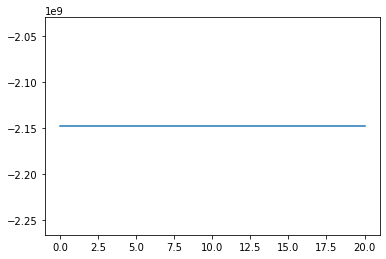




Variable <class 'netCDF4._netCDF4.Variable'>
float32 receiver_sensitivity(ping_time, beam)
    _FillValue: nan
    long_name: Receiver sensitivity
    units: dB re 1/μ
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/receiver_sensitivity
<class 'netCDF4._netCDF4.Variable'>
float32 receiver_sensitivity(ping_time, beam)
    _FillValue: nan
    long_name: Receiver sensitivity
    units: dB re 1/μ
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/receiver_sensitivity size =(21, 860)
statistics min:nan max:nan


C:\Globe\workspace\pyat\notebooks\XSF_Tools\nc_reader.py:263: RuntimeWarning: All-NaN slice encountered
  + str(np.nanmax(v))
C:\Tools\Anaconda3\lib\site-packages\matplotlib\image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
C:\Tools\Anaconda3\lib\site-packages\matplotlib\image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
C:\Tools\Anaconda3\lib\site-packages\matplotlib\image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Tools\Anaconda3\lib\site-packages\matplotlib\image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Tools\Anaconda3\lib\site-packages\matplotlib\colors.py:933: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Tools\Anaconda3\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to 

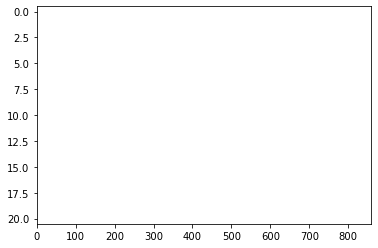




Variable <class 'netCDF4._netCDF4.Variable'>
float32 rx_beam_rotation_phi(ping_time, beam)
    _FillValue: nan
    long_name: receive beam angular rotation about the _x_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/rx_beam_rotation_phi
<class 'netCDF4._netCDF4.Variable'>
float32 rx_beam_rotation_phi(ping_time, beam)
    _FillValue: nan
    long_name: receive beam angular rotation about the _x_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/rx_beam_rotation_phi size =(21, 860)
statistics min:-42.0362 max:42.1385


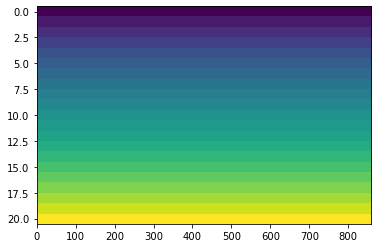




Variable <class 'netCDF4._netCDF4.Variable'>
float32 rx_beam_rotation_psi(ping_time, beam)
    _FillValue: nan
    long_name: receive beam angular rotation about the _z_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/rx_beam_rotation_psi
<class 'netCDF4._netCDF4.Variable'>
float32 rx_beam_rotation_psi(ping_time, beam)
    _FillValue: nan
    long_name: receive beam angular rotation about the _z_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/rx_beam_rotation_psi size =(21, 860)
statistics min:0.0 max:0.0


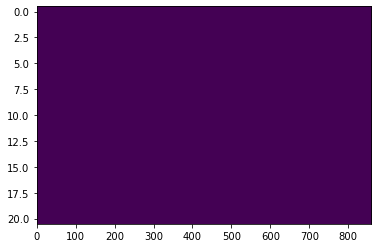




Variable <class 'netCDF4._netCDF4.Variable'>
float32 rx_beam_rotation_theta(ping_time, beam)
    _FillValue: nan
    long_name: receive beam angular rotation about the _y_ axis
    units: arc_degree
    valid_range: [-90.  90.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/rx_beam_rotation_theta
<class 'netCDF4._netCDF4.Variable'>
float32 rx_beam_rotation_theta(ping_time, beam)
    _FillValue: nan
    long_name: receive beam angular rotation about the _y_ axis
    units: arc_degree
    valid_range: [-90.  90.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/rx_beam_rotation_theta size =(21, 860)
statistics min:0.0 max:0.0


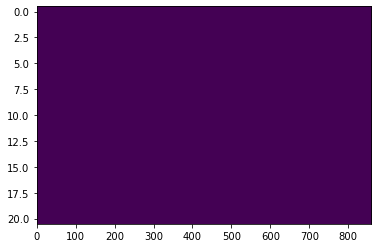




Variable <class 'netCDF4._netCDF4.Variable'>
float32 sample_interval(ping_time)
    _FillValue: nan
    long_name: Interval between recorded raw data samples
    units: s
    valid_min: 0.0
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/sample_interval
<class 'netCDF4._netCDF4.Variable'>
float32 sample_interval(ping_time)
    _FillValue: nan
    long_name: Interval between recorded raw data samples
    units: s
    valid_min: 0.0
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/sample_interval size =(860,)
Statistics min:0.000128 max:0.000128


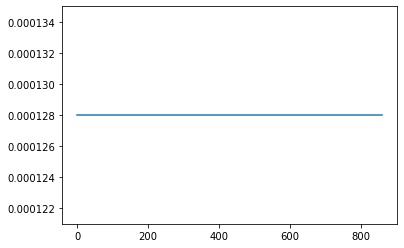




Variable <class 'netCDF4._netCDF4.Variable'>
float32 sample_time_offset(ping_time, tx_beam)
    _FillValue: nan
    long_name: Time offset that is subtracted from the timestamp of each sample
    units: s
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/sample_time_offset
<class 'netCDF4._netCDF4.Variable'>
float32 sample_time_offset(ping_time, tx_beam)
    _FillValue: nan
    long_name: Time offset that is subtracted from the timestamp of each sample
    units: s
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/sample_time_offset size =(21, 860)
statistics min:0.0 max:0.0


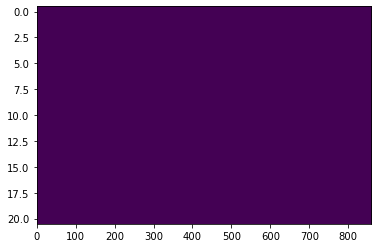




Variable <class 'netCDF4._netCDF4.Variable'>
float32 sound_speed_at_transducer(ping_time)
    _FillValue: nan
    long_name: Indicative sound speed at ping time and transducer depth
    units: m/s
    valid_min: 0.0
    standard_name: speed_of_sound_in_sea_water
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/sound_speed_at_transducer
<class 'netCDF4._netCDF4.Variable'>
float32 sound_speed_at_transducer(ping_time)
    _FillValue: nan
    long_name: Indicative sound speed at ping time and transducer depth
    units: m/s
    valid_min: 0.0
    standard_name: speed_of_sound_in_sea_water
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/sound_speed_at_transducer size =(860,)
Statistics min:1515.4 max:1515.4


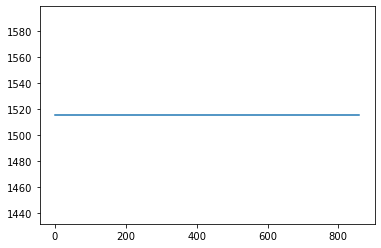




Variable <class 'netCDF4._netCDF4.Variable'>
vlen time_varied_gain(ping_time)
    long_name: Time-varied-gain coefficients
    units: dB
    coordinates: ping_time platform_latitude platform_longitude
vlen data type: float32
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
 : /Sonar/Beam_group1/time_varied_gain
<class 'netCDF4._netCDF4.Variable'>
vlen time_varied_gain(ping_time)
    long_name: Time-varied-gain coefficients
    units: dB
    coordinates: ping_time platform_latitude platform_longitude
vlen data type: float32
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)

Vlen variable /Sonar/Beam_group1/time_varied_gain : reduced shape for display is  ('ping_time',) ((860,))
Variable : /Sonar/Beam_group1/time_varied_gain size =(0, 860)
Empty values dimensions = (0, 860)



Variable <class 'netCDF4._netCDF4.Variable'>
float32 transducer_gain(ping_time, beam)
    _FillValue: nan
    long_name: Gain of transducer
    unit

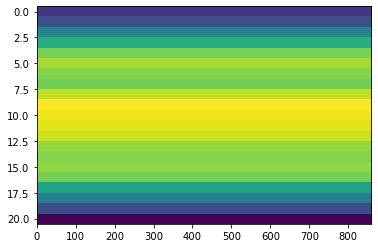




Variable <class 'netCDF4._netCDF4.Variable'>
float32 transmit_bandwidth(ping_time, tx_beam)
    _FillValue: nan
    long_name: Nominal bandwidth of transmitted pulse
    units: Hz
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/transmit_bandwidth
<class 'netCDF4._netCDF4.Variable'>
float32 transmit_bandwidth(ping_time, tx_beam)
    _FillValue: nan
    long_name: Nominal bandwidth of transmitted pulse
    units: Hz
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/transmit_bandwidth size =(21, 860)
statistics min:3544.0 max:3544.0


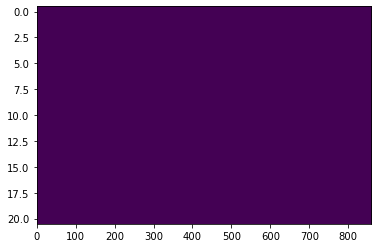




Variable <class 'netCDF4._netCDF4.Variable'>
float32 transmit_duration_nominal(ping_time, tx_beam)
    _FillValue: nan
    long_name: Nominal duration of transmitted pulse
    units: s
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/transmit_duration_nominal
<class 'netCDF4._netCDF4.Variable'>
float32 transmit_duration_nominal(ping_time, tx_beam)
    _FillValue: nan
    long_name: Nominal duration of transmitted pulse
    units: s
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/transmit_duration_nominal size =(21, 860)
statistics min:1024.0 max:1024.0


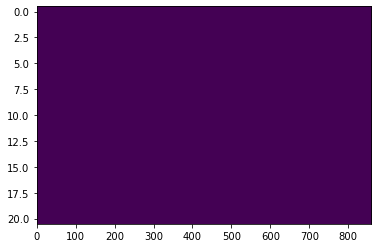




Variable <class 'netCDF4._netCDF4.Variable'>
float32 transmit_frequency_start(ping_time, tx_beam)
    _FillValue: nan
    long_name: Start frequency in transmitted pulse
    standard_name: sound_frequency
    units: Hz
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/transmit_frequency_start
<class 'netCDF4._netCDF4.Variable'>
float32 transmit_frequency_start(ping_time, tx_beam)
    _FillValue: nan
    long_name: Start frequency in transmitted pulse
    standard_name: sound_frequency
    units: Hz
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/transmit_frequency_start size =(21, 860)
statistics min:71943.0 max:118057.0


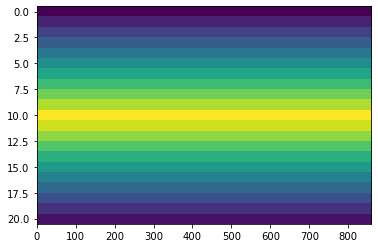




Variable <class 'netCDF4._netCDF4.Variable'>
float32 transmit_frequency_stop(ping_time, tx_beam)
    _FillValue: nan
    long_name: Stop frequency in transmitted pulse
    standard_name: sound_frequency
    units: Hz
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/transmit_frequency_stop
<class 'netCDF4._netCDF4.Variable'>
float32 transmit_frequency_stop(ping_time, tx_beam)
    _FillValue: nan
    long_name: Stop frequency in transmitted pulse
    standard_name: sound_frequency
    units: Hz
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/transmit_frequency_stop size =(21, 860)
statistics min:71943.0 max:118057.0


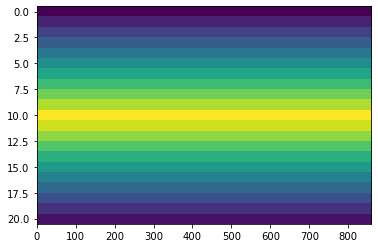




Variable <class 'netCDF4._netCDF4.Variable'>
float32 transmit_power(ping_time, tx_beam)
    _FillValue: nan
    long_name: Nominal transmit power
    units: W
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/transmit_power
<class 'netCDF4._netCDF4.Variable'>
float32 transmit_power(ping_time, tx_beam)
    _FillValue: nan
    long_name: Nominal transmit power
    units: W
    valid_min: 0.0
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/transmit_power size =(21, 860)
statistics min:0.0 max:0.0


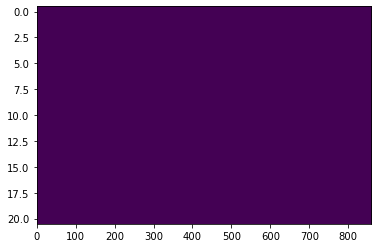




Variable <class 'netCDF4._netCDF4.Variable'>
float32 transmit_source_level(ping_time, tx_beam)
    _FillValue: nan
    long_name: Transmit source level
    units: dB re 1 μPa at 1m
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/transmit_source_level
<class 'netCDF4._netCDF4.Variable'>
float32 transmit_source_level(ping_time, tx_beam)
    _FillValue: nan
    long_name: Transmit source level
    units: dB re 1 μPa at 1m
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/transmit_source_level size =(21, 860)
statistics min:nan max:nan


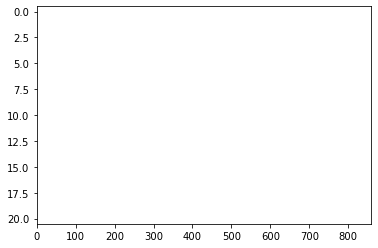




Variable <class 'netCDF4._netCDF4.Variable'>
enum transmit_type(ping_time, tx_beam)
    long_name: Type of transmitted pulse
enum data type: uint8
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
 : /Sonar/Beam_group1/transmit_type
<class 'netCDF4._netCDF4.Variable'>
enum transmit_type(ping_time, tx_beam)
    long_name: Type of transmitted pulse
enum data type: uint8
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)

Variable : /Sonar/Beam_group1/transmit_type size =(21, 860)
statistics min:0 max:0


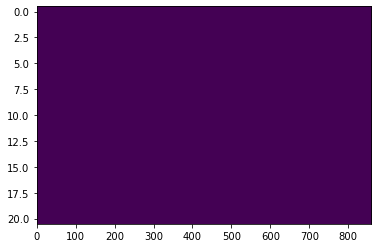




Variable <class 'netCDF4._netCDF4.Variable'>
float32 tx_beam_rotation_phi(ping_time, tx_beam)
    _FillValue: nan
    long_name: transmit beam angular rotation about the _x_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/tx_beam_rotation_phi
<class 'netCDF4._netCDF4.Variable'>
float32 tx_beam_rotation_phi(ping_time, tx_beam)
    _FillValue: nan
    long_name: transmit beam angular rotation about the _x_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/tx_beam_rotation_phi size =(21, 860)
statistics min:-42.0362 max:42.1385


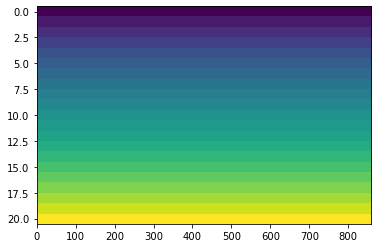




Variable <class 'netCDF4._netCDF4.Variable'>
float32 tx_beam_rotation_psi(ping_time, tx_beam)
    _FillValue: nan
    long_name: transmit beam angular rotation about the _z_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/tx_beam_rotation_psi
<class 'netCDF4._netCDF4.Variable'>
float32 tx_beam_rotation_psi(ping_time, tx_beam)
    _FillValue: nan
    long_name: transmit beam angular rotation about the _z_ axis
    units: arc_degree
    valid_range: [-180.  180.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/tx_beam_rotation_psi size =(21, 860)
statistics min:0.0 max:0.0


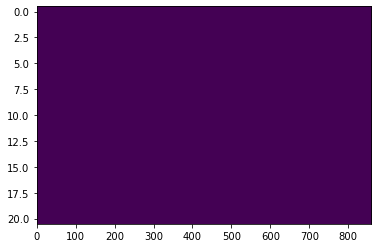




Variable <class 'netCDF4._netCDF4.Variable'>
float32 tx_beam_rotation_theta(ping_time, tx_beam)
    _FillValue: nan
    long_name: transmit beam angular rotation about the _y_ axis
    units: arc_degree
    valid_range: [-90.  90.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on : /Sonar/Beam_group1/tx_beam_rotation_theta
<class 'netCDF4._netCDF4.Variable'>
float32 tx_beam_rotation_theta(ping_time, tx_beam)
    _FillValue: nan
    long_name: transmit beam angular rotation about the _y_ axis
    units: arc_degree
    valid_range: [-90.  90.]
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860, 21)
filling on
Variable : /Sonar/Beam_group1/tx_beam_rotation_theta size =(21, 860)
statistics min:0.0 max:0.0


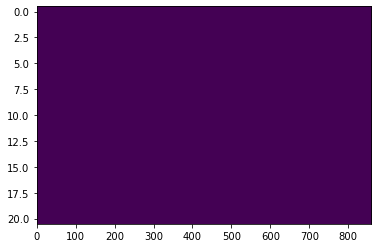




Variable <class 'netCDF4._netCDF4.Variable'>
float32 tx_transducer_depth(ping_time)
    _FillValue: nan
    long_name: Tx transducer depth below waterline
    units: m
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/tx_transducer_depth
<class 'netCDF4._netCDF4.Variable'>
float32 tx_transducer_depth(ping_time)
    _FillValue: nan
    long_name: Tx transducer depth below waterline
    units: m
    coordinates: ping_time platform_latitude platform_longitude
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/tx_transducer_depth size =(860,)
Statistics min:-0.30340728 max:0.2487778


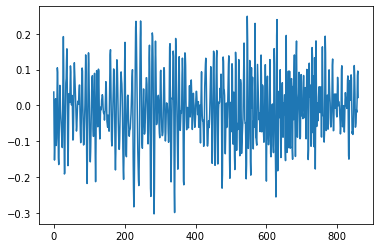




Variable <class 'netCDF4._netCDF4.Variable'>
float32 waterline_to_chart_datum(ping_time)
    _FillValue: nan
    long_name: vertical translation from waterline to chart datum reference 
    units: m
    coordinates: ping_time platform_latitude platform_longitude
    vertical_coordinate_reference_system: MSL depth
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on : /Sonar/Beam_group1/waterline_to_chart_datum
<class 'netCDF4._netCDF4.Variable'>
float32 waterline_to_chart_datum(ping_time)
    _FillValue: nan
    long_name: vertical translation from waterline to chart datum reference 
    units: m
    coordinates: ping_time platform_latitude platform_longitude
    vertical_coordinate_reference_system: MSL depth
path = /Sonar/Beam_group1
unlimited dimensions: ping_time
current shape = (860,)
filling on
Variable : /Sonar/Beam_group1/waterline_to_chart_datum size =(860,)
Statistics min:nan max:nan


C:\Globe\workspace\pyat\notebooks\XSF_Tools\nc_reader.py:246: RuntimeWarning: All-NaN slice encountered
  + str(np.nanmax(v))


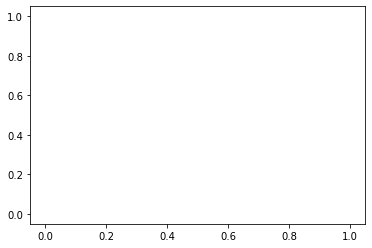

In [11]:
reader.dump_content(root="/Sonar/Beam_group1/",slice_index={'beam':10})